In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [ ]:
k = 10
iters = 1000

In [ ]:
class greedy:
  def __init__(self,N):
    self.N = N
    self.n = 0            
    self.k_n = np.zeros(k)
    self.reward = np.zeros(k)
    self.k_action_value = np.zeros(k)
    self.regret = np.zeros(iters+1)
    self.mu = np.random.normal(0, 1, k)

  def pull(self):
    while (self.n<iters):
      for arm in range(k):
        self.reward[arm] = np.random.normal(self.mu[arm], 1)
      best = np.argmax(self.reward)
      if self.n < (self.N):
        a = np.random.choice(k)
      else:
        a = np.argmax(self.k_action_value)
      self.n += 1
      self.k_n[a] += 1
      self.k_action_value[a] = self.k_action_value[a]*(self.n-1)/self.n + (self.reward[a]/self.n)
      reg_n=self.reward[best]-self.reward[a]
      self.regret[self.n] = reg_n+self.regret[self.n-1]
    return self.regret[self.n]


In [ ]:
class epsilon_greedy:
  def __init__(self,eps):
    self.n = 0            
    self.k_n = np.zeros(k)
    self.reward = np.zeros(k)
    self.k_action_value = np.zeros(k)
    self.regret = np.zeros(iters+1)
    self.mu = np.random.normal(0, 1, k)
    self.eps=eps
    #print(self.eps)

  def pull(self):
    while (self.n<iters):
      for arm in range(k):
        self.reward[arm] = np.random.normal(self.mu[arm], 1)
      best = np.argmax(self.reward)
      p = np.random.random()
      if self.n==0:
          a = np.random.choice(k) 
      elif p < self.eps:
          a = np.random.choice(k)        
      else:
          a = np.argmax(self.k_action_value)

      self.n += 1
      self.k_n[a] += 1
      self.k_action_value[a] = self.k_action_value[a]*(self.n-1)/self.n + (self.reward[a]/self.n)

      reg_n=self.reward[best]-self.reward[a]
      
      self.regret[self.n] = reg_n+self.regret[self.n-1]
      
    return self.regret[self.n]

In [ ]:
class UCB( ):
    def __init__( self,c):    
        self.confidence_level = c
        self.n = 0          
        self.k_n = np.zeros(k)
        self.ucb_v = np.zeros(k)
        self.reward = np.zeros(k)
        self.k_action_value = np.zeros(k)
        self.regret = np.zeros(iters+1)
        self.mu = np.random.normal(0, 1, k)

    def pull(self):  
      while (self.n<iters):
        for arm in range(k):
          self.reward[arm] = np.random.normal(self.mu[arm], 1)
        best = np.argmax(self.reward)
        for j in range(k):
          un=self.confidence_level*(self.n/self.k_n[j])**(1/2)
          self.ucb_v[j]=self.k_action_value[j]+un
          a=np.argmax(self.ucb_v)
        
        self.n += 1
        self.k_n[a] += 1     
        self.k_action_value[a] = self.k_action_value[a]*(self.n)/self.n + (self.reward[a]/self.n)
  
        reg_n=self.reward[best]-self.reward[a]
        self.regret[self.n] = reg_n+self.regret[self.n-1]
      return self.regret[self.n]


Text(0, 0.5, 'Regret after 1000 iters')

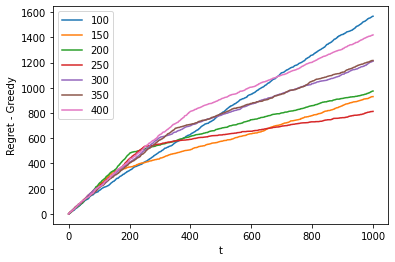

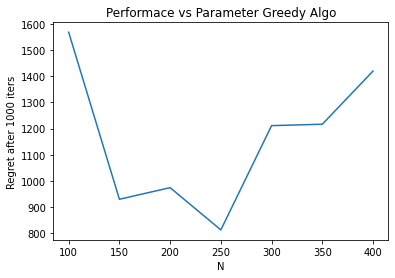

In [ ]:
# Greedy
explore_t=[100,150,200,250,300,350,400]
reg=np.zeros(len(explore_t));
for count, i in enumerate(explore_t):
  greed= greedy(i)
  reg[count]=greed.pull()


  plt.figure(2)
  plt.plot(greed.regret,label=i)
  plt.legend()
  plt.xlabel(('t'))
  plt.ylabel(('Regret - Greedy'))

plt.figure(1)
plt.title(('Performace vs Parameter Greedy Algo'))
plt.plot(explore_t,reg)
plt.xlabel(('N'))
plt.ylabel(('Regret after 1000 iters'))

Text(0, 0.5, 'Regret')

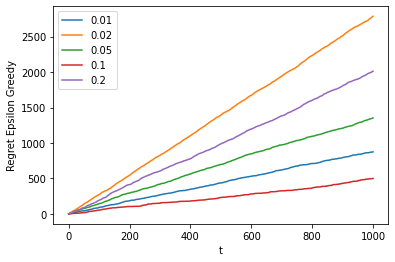

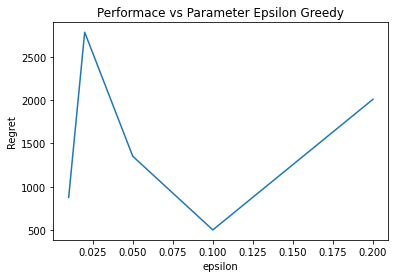

In [ ]:
# Epsilon Greedy
epsilon=[0.01,0.02,0.05,0.1,0.2]
reg1=np.zeros(len(epsilon));
for count, ip in enumerate(epsilon):
  e_greed= epsilon_greedy(ip)
  reg1[count]=e_greed.pull()
  #print(ip)
  plt.figure(2)
  plt.plot(e_greed.regret, label=ip)
  plt.legend()
  plt.xlabel(('t'))
  plt.ylabel(('Regret Epsilon Greedy'))

plt.figure(1)
plt.title(('Performace vs Parameter Epsilon Greedy'))
plt.plot(epsilon,reg1)
plt.xlabel(('epsilon'))
plt.ylabel(('Regret'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scal

Text(0, 0.5, 'Regret')

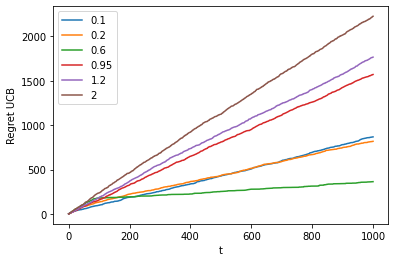

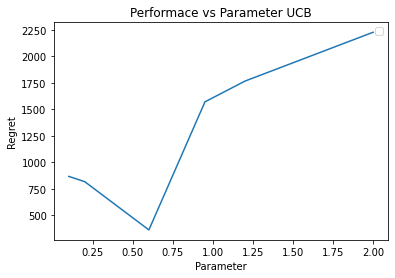

In [ ]:
# UCB
c=[0.1,0.2,0.6,0.95,1.2,2]
reg2=np.zeros(len(c))
for count,i in enumerate(c):
  upper_con= UCB(i)
  reg2[count]=upper_con.pull()

  plt.figure(2)
  plt.plot(upper_con.regret,label=i)
  plt.legend()
  plt.xlabel(('t'))
  plt.ylabel(('Regret UCB'))

plt.figure(1)
plt.title(('Performace vs Parameter UCB'))
plt.plot(c,reg2)
plt.legend()
plt.xlabel(('Parameter c'))
plt.ylabel(('Regret'))

In [ ]:
class Grad( ):
    def __init__( self,alpha):    
        self.alpha = alpha
        self.n = 0          
        self.k_n = np.zeros(k)
        self.reward = np.zeros(k)
        self.k_action_value = np.zeros(k)
        self.regret = np.zeros(iters+1)
        self.mu = np.random.normal(0, 1, k)
        self.k_h=np.zeros(k)
        self.r_mean=np.zeros(k)
        self.prob=np.zeros(k)

    def pull(self):  
      while (self.n<iters):
        self.reward= np.random.normal(self.mu, 1)
        best = np.argmax(self.reward)

        for p in range(k):
          self.prob[p]=np.exp(self.k_h[p])/np.exp(self.k_h).sum()

        a=np.argmax(self.prob)
        self.n += 1
        self.k_n[a] += 1     

        self.r_mean[a]=(self.r_mean[a]*(self.k_n[a]-1)+self.reward[a])/self.k_n[a]

        for p in range(k):
          if p==a:
            self.k_h[p]=self.k_h[p]+self.alpha*(self.reward[p]-self.r_mean[p])*(1-self.prob[p])
          else:
            self.k_h[p]=self.k_h[p]-self.alpha*(self.reward[p]-self.r_mean[p])*(self.prob[p])

  
        reg_n=self.reward[best]-self.reward[a]
        self.regret[self.n] = reg_n+self.regret[self.n-1]
      return self.regret[self.n]

No handles with labels found to put in legend.


Text(0, 0.5, 'Regret')

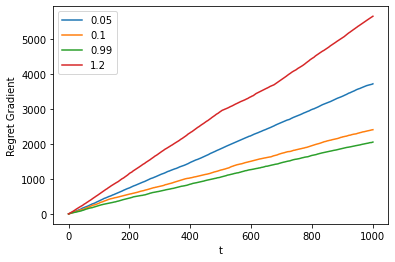

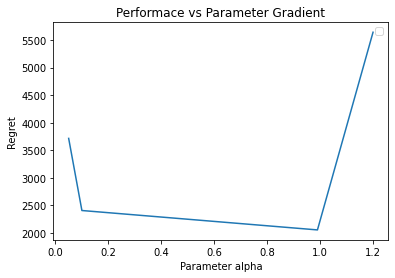

In [ ]:
# Gradient
g=[0.05,0.1,0.99,1.2]
reg3=np.zeros(len(g))
for count,i in enumerate(g):
  st= Grad(i)
  reg3[count]=st.pull()
  plt.figure(2)

  plt.plot(st.regret,label=i)
  plt.legend()
  plt.xlabel(('t'))
  plt.ylabel(('Regret Gradient'))

plt.figure(1)
plt.title(('Performace vs Parameter Gradient'))
plt.plot(g,reg3)
plt.legend()
plt.xlabel(('Parameter alpha'))
plt.ylabel(('Regret')) 

In [ ]:
# Comparion of best UCB and best epsilon greedy case - Regret

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


Text(0, 0.5, 'Regret')

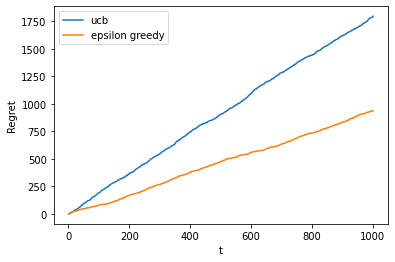

In [ ]:
  ucb3= UCB(1.2)
  ucb3.pull()
  e_greed3= epsilon_greedy(0.05)
  e_greed3.pull()
  plt.plot(np.linspace(1,1001,1001),ucb3.regret,label='ucb')
  plt.plot(np.linspace(1,1001,1001),e_greed3.regret,label='epsilon greedy')
  plt.legend()
  plt.xlabel(('t'))
  plt.ylabel(('Regret'))